In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# matplotlib configuration
sns.set_style(style='white')
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(18,12)})

# pandas configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [2]:
df = pd.read_csv('cleaned_airbnb_data.csv', index_col = 0)

In [3]:
qual_cols = ['NAME', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood',
            'instant_bookable', 'cancellation_policy', 'room_type', 'house_rules']
quan_cols = ['lat', 'long', 'price', 'service_fee', 'minimum_nights', 
                'number_of_reviews', 'Construction_year', 'review_rate_number', 
                'calculated_host_listings_count', 'availability_365']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97986 entries, 0 to 102598
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              97986 non-null  int64  
 1   NAME                            97986 non-null  object 
 2   host_id                         97986 non-null  int64  
 3   host_identity_verified          97986 non-null  bool   
 4   host_name                       97986 non-null  object 
 5   neighbourhood_group             97986 non-null  object 
 6   neighbourhood                   97986 non-null  object 
 7   lat                             97986 non-null  float64
 8   long                            97986 non-null  float64
 9   instant_bookable                97986 non-null  bool   
 10  cancellation_policy             97986 non-null  object 
 11  room_type                       97986 non-null  object 
 12  Construction_year              

#### Observation: Construction Year does not have observable influence on price of AirBnb

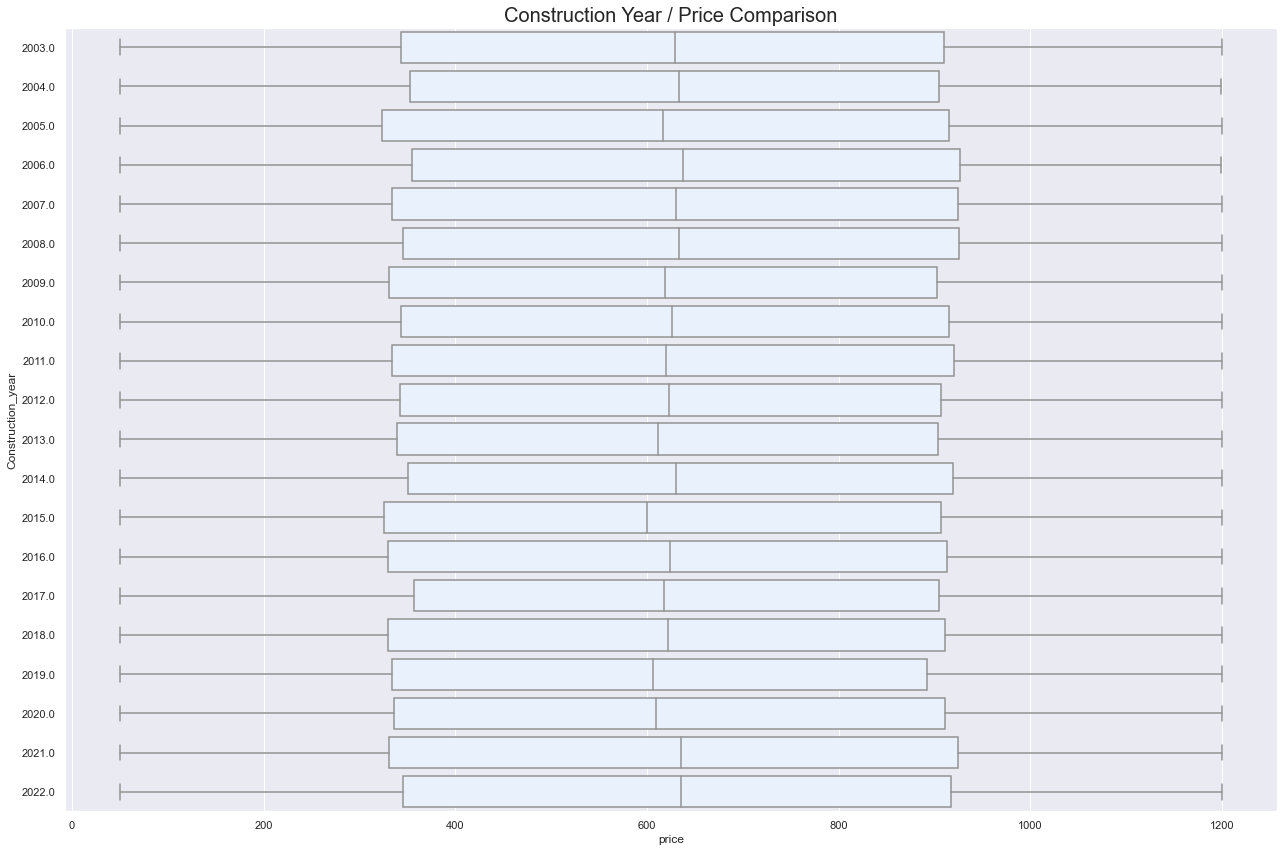

In [8]:
g = sns.boxplot(
    data = df,
    x = 'price',
    y = 'Construction_year',
    orient = 'h',
    color = '#e6f2ff'
)

g.set_title('Construction Year / Price Comparison', fontsize = 20)
plt.tight_layout()
plt.show()

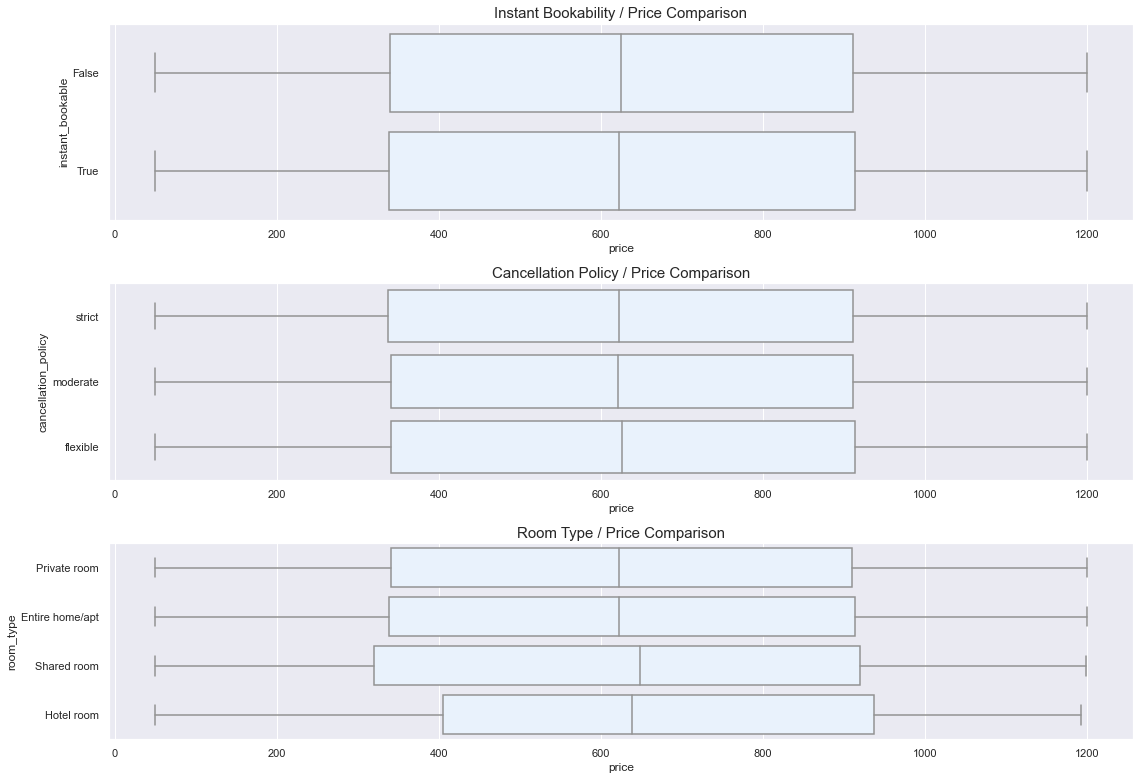

In [9]:
f, ax = plt.subplots(3, 1, figsize = (16,11))

sns.boxplot(
    data = df,
    x = 'price',
    y = 'instant_bookable',
    orient = 'h',
    color = '#e6f2ff',
    ax=ax[0]
)
sns.boxplot(
    data = df,
    x = 'price',
    y = 'cancellation_policy',
    orient = 'h',
    color = '#e6f2ff',
    ax=ax[1]
)
sns.boxplot(
    data = df,
    x = 'price',
    y = 'room_type',
    orient = 'h',
    color = '#e6f2ff',
    ax=ax[2]
)

ax[0].set_title('Instant Bookability / Price Comparison', fontsize = 15)
ax[1].set_title('Cancellation Policy / Price Comparison', fontsize = 15)
ax[2].set_title('Room Type / Price Comparison', fontsize = 15)

plt.tight_layout()
plt.show()

In [183]:
df.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,51147.0,624.481006,331.824969,50.0,339.0,622.0,914.00,1200.0
Hotel room,112.0,665.562500,313.493445,50.0,405.5,638.5,937.25,1193.0
Private room,44581.0,625.327628,331.170458,50.0,341.0,623.0,910.00,1200.0
Shared room,2146.0,629.948742,338.140124,50.0,320.0,648.0,920.00,1199.0


#### Plotting distritbution of minimum nights

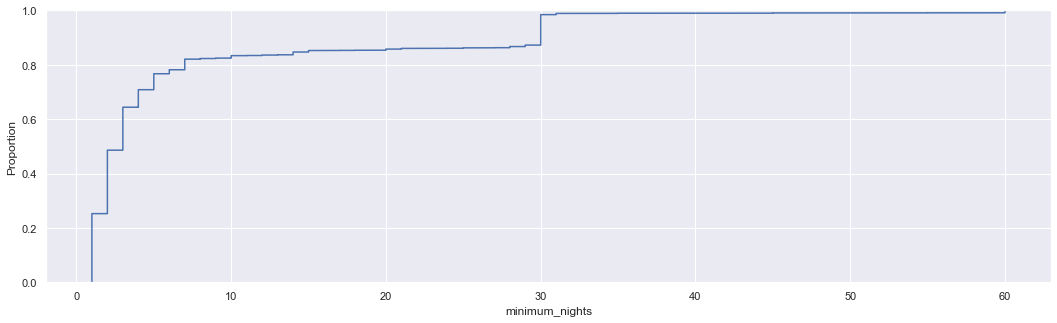

In [175]:
g = sns.ecdfplot(
    data = df,
    x = 'minimum_nights'
)

# g.set(xlim = (0, 90), xticks=range(0, 90, 1))
# plt.xticks(rotation=45)
# g.set(title = 'Minimum Nights Distribution')

plt.show()

### Plotting distribution of 365 Availability

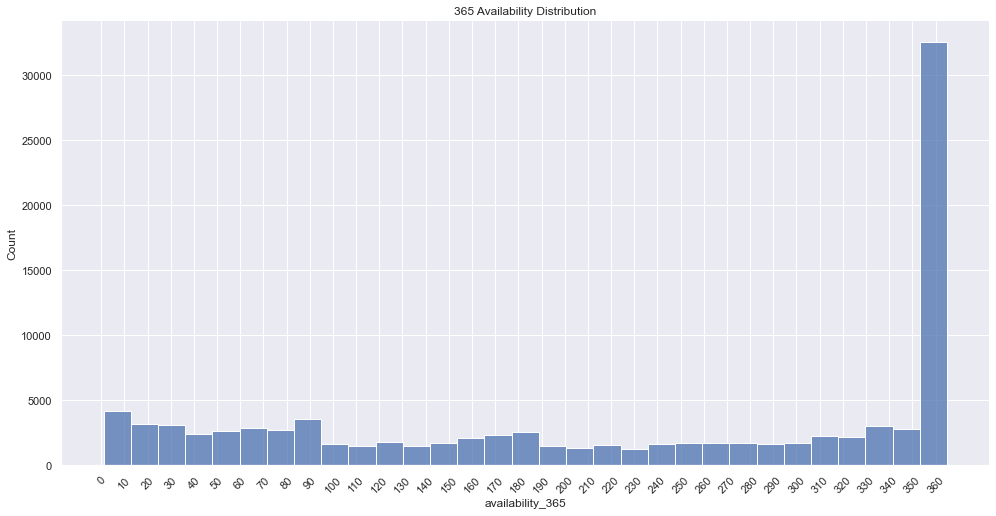

In [37]:
g = sns.displot(
    data = df,
    kind = 'hist',
    x = 'availability_365',
    aspect = 2,
    height = 7,
)

g.set(xticks=range(0, 365, 10))
plt.xticks(rotation=45)
g.set(title = '365 Availability Distribution')
plt.show()

#### Plotting distribution of total listings in each Neighbourhood Group

In [62]:
df_neighbourhood = (
 df.groupby(['neighbourhood_group', 'neighbourhood'])[['Construction_year', 'price', 'service_fee']]
 .mean()
 .reset_index()
)

sorted_df_neighbourhood = df_neighbourhood.sort_values(by=['neighbourhood_group', 'price']).set_index(['neighbourhood_group', 'neighbourhood'])

In [93]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

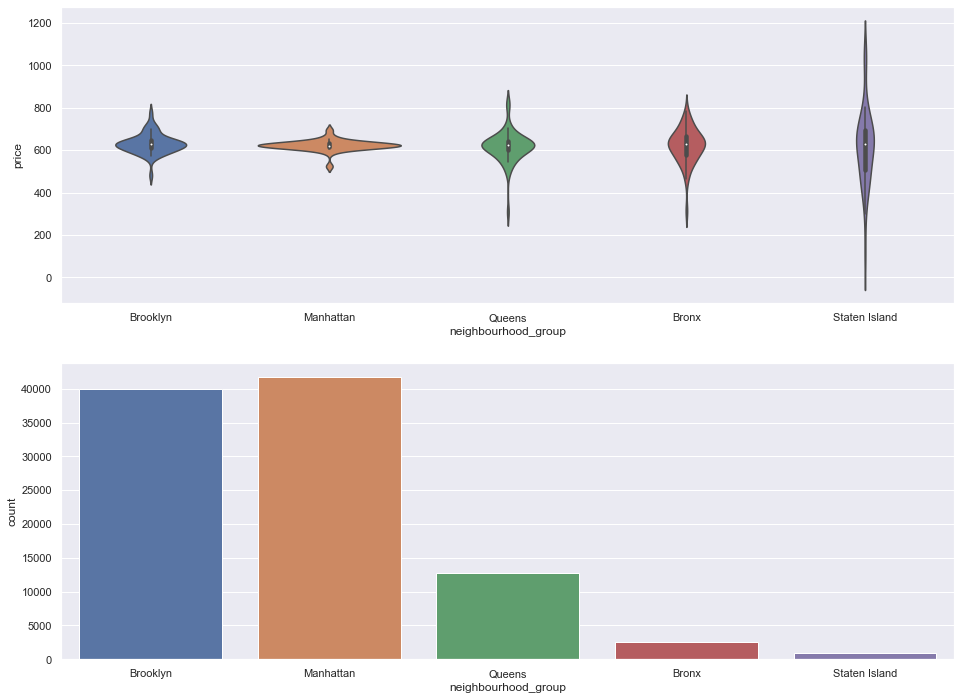

In [95]:
f, ax = plt.subplots(2, 1, figsize=(16,12))

sns.violinplot(
    data = df_neighbourhood,
    x = 'neighbourhood_group',
    y = 'price',
    order = ['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
    ax = ax[0]
)

sns.countplot(
    data = df,
    x = 'neighbourhood_group',
    order = ['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island']
)

#### Correlation

<AxesSubplot:>

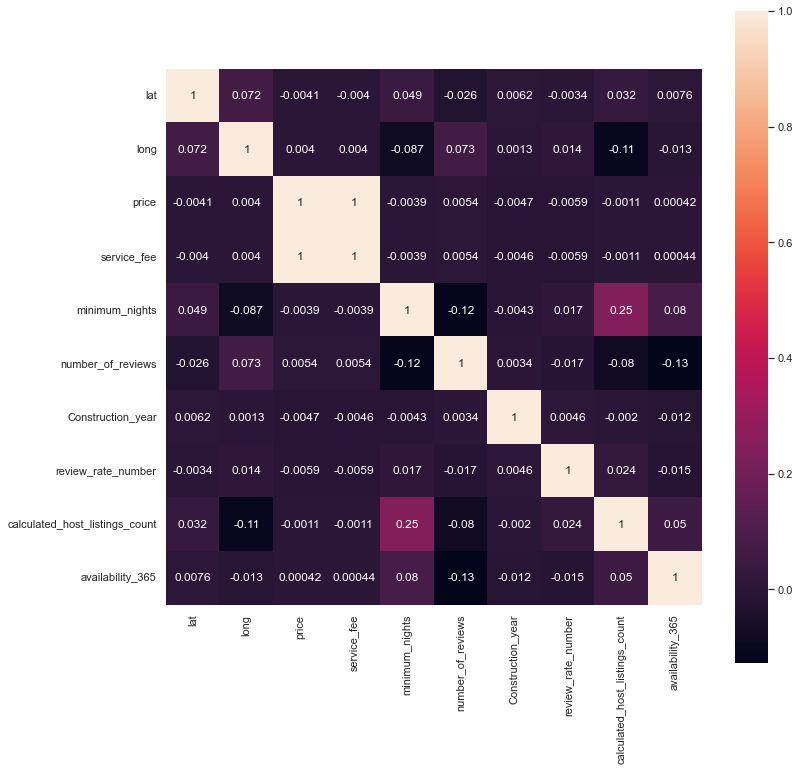

In [109]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(df[quan_cols].corr(), annot=True, square=True)

In [8]:
df

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,Construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,False,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,True,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,True,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,True,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,365.0,"No smoking, please, and no drugs."
7,1005202,BlissArtsSpace!,90821839709,False,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2009.0,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,True,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,844.0,169.0,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,False,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,837.0,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,365.0,House rules: Guests agree to the following ter...
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,False,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,988.0,198.0,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,False,Christopher,Queens,Long Island City,40.74989,-73.93777,True,strict,Entire home/apt,2015.0,546.0,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,365.0,NaN
